### Курс «Теория вероятностей и математическая статистика»
### Практическое задание к уроку 7
## Тема «Многомерный статистический анализ. Линейная регрессия»

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression


def sum_of_squares(samples):
    return ((samples - samples.mean()) ** 2).sum()


X = pd.DataFrame([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])
R_max = 0
pair_max = []

In [2]:
pairs = []
for i in range(0, 3):
    for j in range(i+1, 4):
        pair = [i, j]
        pairs.append(pair)
    
pairs

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]

In [3]:
for pair in range(0,len(pairs)):
    print(f'\nПара параметров {pairs[pair]}')
    x = X[pairs[pair]].values

    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))

    XTX = x.T.dot(x)
    d = np.linalg.det(XTX)
    print(f'Определитель: {d}, не равен 0 ({d != 0})')
    if d != 0:
        XTX_inv = np.linalg.inv(XTX)
    
        print('Уравнение по формулам')
        b = XTX_inv.dot(x.T).dot(y)
        print(f'y = {round(b[0],5)} + {round(b[1],5)} * x{pairs[pair][0]} + {round(b[2],5)} * x{pairs[pair][1]}')
    
        print('Уравнение по модели линейной регрессии')
        model = LinearRegression().fit(x, y)
        model.intercept_, model.coef_
        print(f'y = {round(model.intercept_,5)} + {round(model.coef_[1],5)} * x{pairs[pair][0]} + {round(model.coef_[2],5)} * x{pairs[pair][1]}')
    
        z = x.dot(b)
    
        R = 1 - ((y - z)**2).sum() / sum_of_squares(y)
        print(f'Коэффициент детерминации: {R}')
        if R > R_max:
            R_max = R
            pair_max = pairs[pair]


Пара параметров [0, 1]
Определитель: 349.77820338188496, не равен 0 (True)
Уравнение по формулам
y = 6.70782 + 0.40787 * x0 + 1.0336 * x1
Уравнение по модели линейной регрессии
y = 6.70782 + 0.40787 * x0 + 1.0336 * x1
Коэффициент детерминации: 0.18113594742585226

Пара параметров [0, 2]
Определитель: 2835.3600226240965, не равен 0 (True)
Уравнение по формулам
y = 3.62456 + 1.62531 * x0 + 1.21135 * x2
Уравнение по модели линейной регрессии
y = 3.62456 + 1.62531 * x0 + 1.21135 * x2
Коэффициент детерминации: 0.7634246238793152

Пара параметров [0, 3]
Определитель: 1689.2124743606066, не равен 0 (True)
Уравнение по формулам
y = 5.70686 + 0.6836 * x0 + 1.12651 * x3
Уравнение по модели линейной регрессии
y = 5.70686 + 0.6836 * x0 + 1.12651 * x3
Коэффициент детерминации: 0.4532966783144077

Пара параметров [1, 2]
Определитель: 1427.8125776081506, не равен 0 (True)
Уравнение по формулам
y = 2.48896 + 1.60612 * x1 + 0.8627 * x2
Уравнение по модели линейной регрессии
y = 2.48896 + 1.60612 * x1 

Максимальный коэффициент детерминации 0.7634246238793152 для пары нулевого и второго параметров.

In [4]:
pair_max, R_max

([0, 2], 0.7634246238793152)

In [5]:
n = X[pair_max].shape[0]
m = X[pair_max].shape[1]

k1 = m
k2 = n - m - 1

k1, k2

(2, 7)

In [6]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область:
$$\Omega_\alpha = \left( 4.74, \infty \right)$$

In [7]:
F = (R_max / k1) / ((1 - R_max) / k2)
F

11.29443912292265

Статистика попала в критическую область, уравнение регрессии признаётся значимым.

__Задача 2__

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. (доп) Посчитать среднюю ошибку аппроксимации

In [8]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [9]:
b = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary**2) - np.mean(salary) ** 2)
b

2.620538882402765

In [10]:
a = np.mean(scoring) - b * np.mean(salary)
a

444.1773573243596

In [11]:
print(f'scoring = {round(a,3)} + {round(b,3)} * salary')

scoring = 444.177 + 2.621 * salary


In [12]:
salary_ = pd.DataFrame(salary).values
salary_
scoring_ = pd.DataFrame(scoring).values

In [13]:
ones = np.ones((salary_.shape[0], 1))
salary_ = np.hstack((ones, salary_))
salary_

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [14]:
salary_T_salary = salary_.T.dot(salary_)

np.linalg.det(salary_T_salary)

349464.00000000023

In [15]:
salary_T_salary_inv = np.linalg.inv(salary_T_salary)

b1 = salary_T_salary_inv.dot(salary_.T).dot(scoring_)

print(f'scoring = {round(b1[0][0],3)} + {round(b1[1][0],3)} * salary')

scoring = 444.177 + 2.621 * salary


In [16]:
scoring_pred = a + b * salary
scoring_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

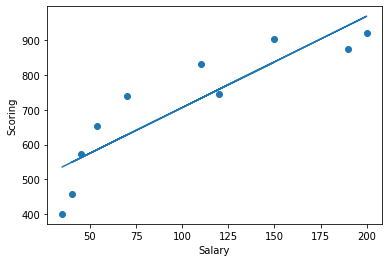

In [17]:
import matplotlib.pyplot as plt

plt.scatter(salary, scoring)
plt.plot(salary, scoring_pred)
plt.xlabel('Salary')
plt.ylabel('Scoring')
plt.show()

In [18]:
r = b * np.std(salary) / np.std(scoring)
r

0.8874900920739162

In [19]:
# Коэффициент детерминации
R2 = r**2
R2

0.7876386635293682

In [20]:
n = salary.shape[0]
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 8)

In [21]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.317655071578714

In [22]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
F_fact

29.671640859664432

In [23]:
F_fact > t

True

In [24]:
# Средняя ошибка аппроксимации
A_mean = 100 * np.mean(np.abs((scoring - scoring_pred) / scoring))
A_mean

11.46925184356171